# Предобработка

Загрузка библиотек

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn import preprocessing
from pandas.plotting import scatter_matrix

Чтение файлов из шаблона

In [64]:
dat1 = pd.read_excel('C:/Users/KiBor/projects/VKR/X_bp_vkrdataset.xlsx')
dat1.drop(['Unnamed: 0'], axis=1, inplace=True)
dat2 = pd.read_excel('C:/Users/KiBor/projects/VKR/X_nup_vkrdataset.xlsx')
dat2.drop(['Unnamed: 0'], axis=1, inplace=True)

Объединение по индексу тип объединения INNER

In [3]:
data = dat1.merge(dat2, left_index = True, right_index = True, how = 'inner')
data

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

Проверка датасета на пустые значения

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Название столбцов

In [5]:
#colnames = ["Соотношение матрица-наполнитель","Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%",
#         "Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2",
#         "Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",
#        "Угол нашивки, град","Шаг нашивки","Плотность нашивки"]
colnames = data.columns

## Разведочный анализ

Соотношение матрица-наполнитель


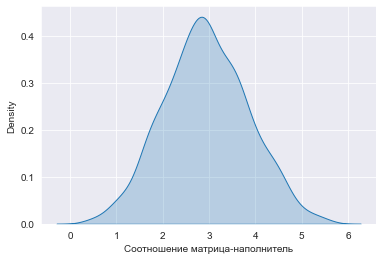

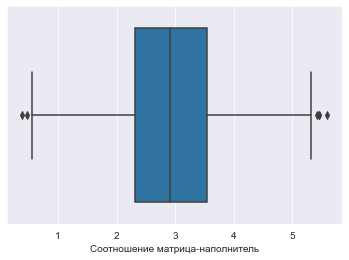

Минимальное значение:  0.389402605178414
Максимальное значение:  5.59174159869754
Среднее значение:  2.9303657734325506
Медианное значение:  2.90687765033521



Плотность, кг/м3


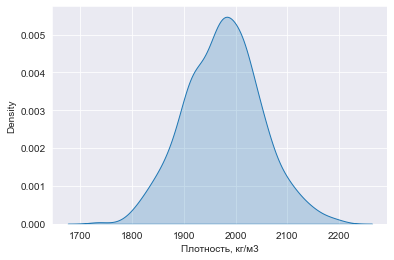

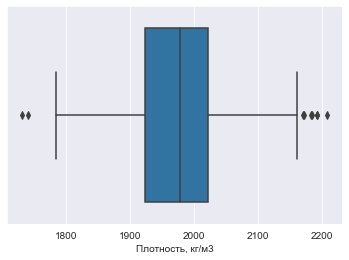

Минимальное значение:  1731.764635096
Максимальное значение:  2207.77348061119
Среднее значение:  1975.7348881101548
Медианное значение:  1977.62165679058



модуль упругости, ГПа


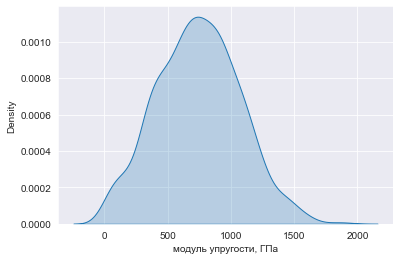

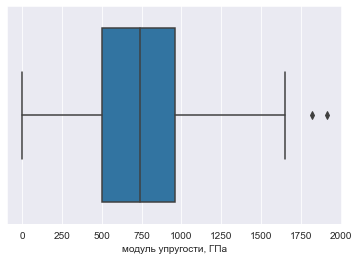

Минимальное значение:  2.4369087535075
Максимальное значение:  1911.53647700054
Среднее значение:  739.9232327560719
Медианное значение:  739.664327697792



Количество отвердителя, м.%


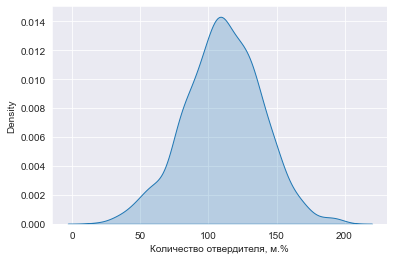

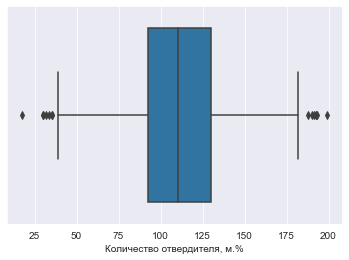

Минимальное значение:  17.7402745562519
Максимальное значение:  198.953207190451
Среднее значение:  110.57076864736258
Медианное значение:  110.564839894065



Содержание эпоксидных групп,%_2


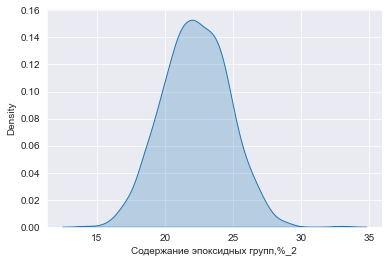

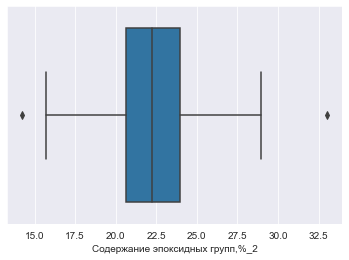

Минимальное значение:  14.2549854977161
Максимальное значение:  33.0
Среднее значение:  22.24438954776772
Медианное значение:  22.2307437560244



Температура вспышки, С_2


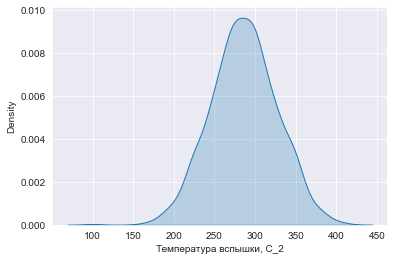

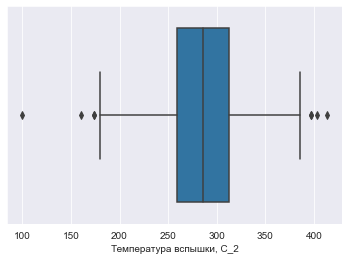

Минимальное значение:  100.0
Максимальное значение:  413.273418243566
Среднее значение:  285.88215135162227
Медианное значение:  285.896812331237



Поверхностная плотность, г/м2


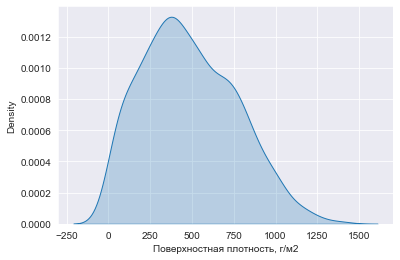

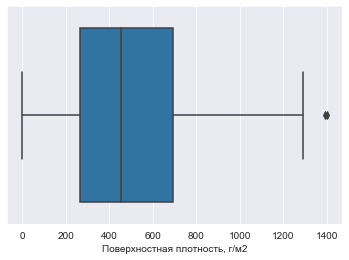

Минимальное значение:  0.603739925153945
Максимальное значение:  1399.54236233989
Среднее значение:  482.7318330384181
Медианное значение:  451.86436518306



Модуль упругости при растяжении, ГПа


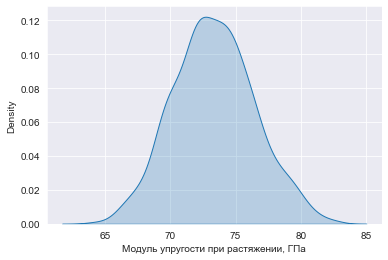

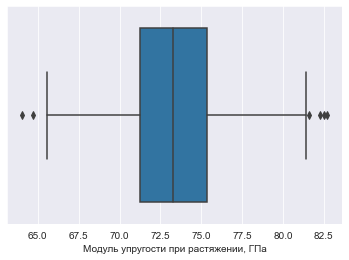

Минимальное значение:  64.0540605597917
Максимальное значение:  82.682051035271
Среднее значение:  73.32857125009073
Медианное значение:  73.2688045943481



Прочность при растяжении, МПа


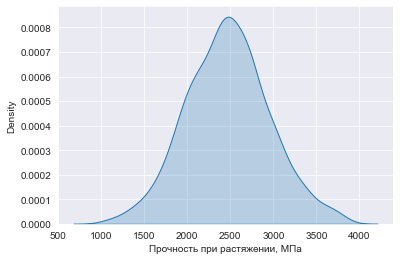

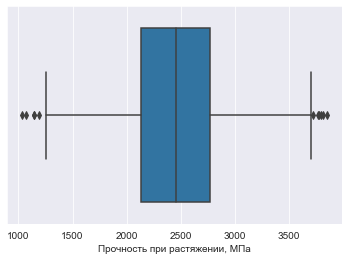

Минимальное значение:  1036.85660535
Максимальное значение:  3848.43673187618
Среднее значение:  2466.9228426979025
Медианное значение:  2459.52452600309



Потребление смолы, г/м2


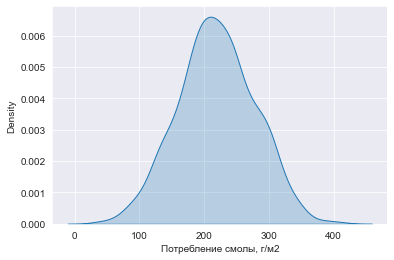

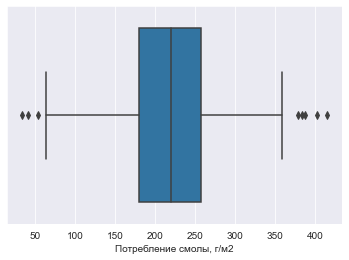

Минимальное значение:  33.8030255329625
Максимальное значение:  414.590628361534
Среднее значение:  218.42314367654265
Медианное значение:  219.198882195134



Угол нашивки, град


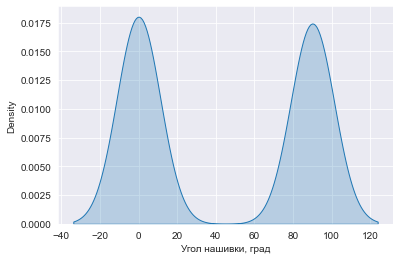

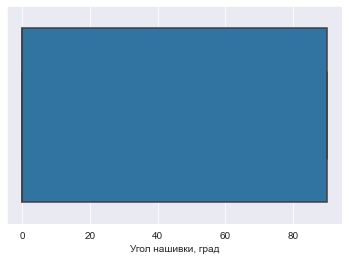

Минимальное значение:  0
Максимальное значение:  90
Среднее значение:  44.252199413489734
Медианное значение:  0.0



Шаг нашивки


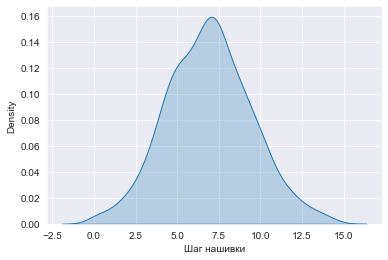

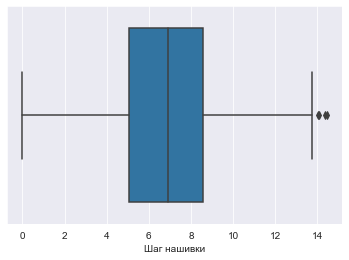

Минимальное значение:  0.0
Максимальное значение:  14.4405218753969
Среднее значение:  6.899222077675024
Медианное значение:  6.9161438559491



Плотность нашивки


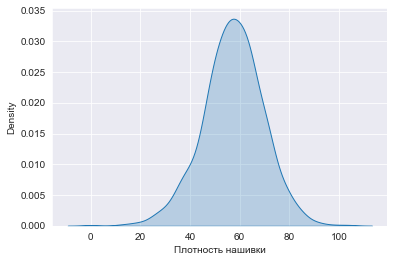

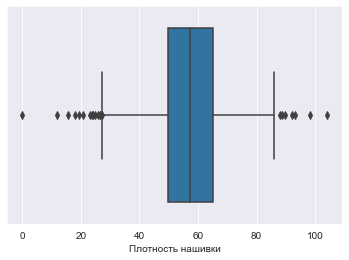

Минимальное значение:  0.0
Максимальное значение:  103.988901301494
Среднее значение:  57.15392943285763
Медианное значение:  57.3419198469929





In [6]:
for colname in colnames:
    print(colname)
    
    #Гистограмма распределения
    sub_data = data[colname]
    sns.set_style("darkgrid")
    sns.kdeplot(data=sub_data, shade=True, palette='colorblind')
    plt.show()
    
    #Диаграмма "Ящик с усами"
    sns.boxplot(x=sub_data);
    plt.show()
    
    #Значения (мин макс ср)
    print("Минимальное значение: ", end=" ")
    print(np.min(sub_data))
    print("Максимальное значение: ", end=" ")
    print(np.max(sub_data))
    print("Среднее значение: ", end=" ")
    print(np.mean(sub_data))

    print("Медианное значение: ", end=" ")
    print(np.median(sub_data))
    print("\n\n")

Столбцы с выбросами

In [7]:
colnames_drop = ["Соотношение матрица-наполнитель",
                 "Плотность, кг/м3",
                 "модуль упругости, ГПа",
                 "Количество отвердителя, м.%",
                 "Содержание эпоксидных групп,%_2",
                 "Температура вспышки, С_2",
                 "Поверхностная плотность, г/м2",
                 "Модуль упругости при растяжении, ГПа",
                 "Прочность при растяжении, МПа",
                 "Потребление смолы, г/м2",
                 "Шаг нашивки",
                 "Плотность нашивки"]

Замена выбросов на пустые значения

In [8]:
for x in colnames_drop:
    q75, q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    data.loc[data[x] < min, x] = np.nan
    data.loc[data[x] > max, x] = np.nan
data.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

Удаляем пустые значения

In [9]:
data_pure = data.dropna(axis=0)
data_pure.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Повторный разведочный анализ (без выбросов)

Соотношение матрица-наполнитель


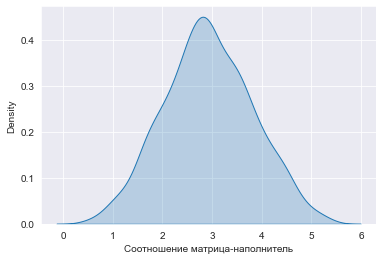

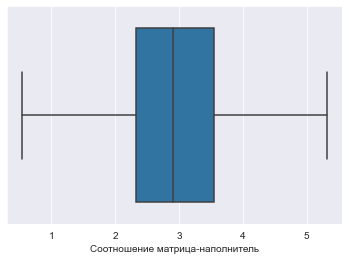

Минимальное значение:  0.547391007365624
Максимальное значение:  5.3141436851035
Среднее значение:  2.925683381793367
Медианное значение:  2.904730696156465



Плотность, кг/м3


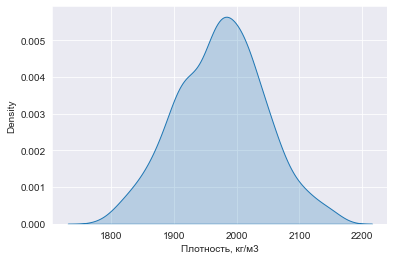

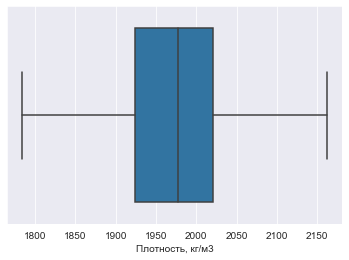

Минимальное значение:  1784.48224524858
Максимальное значение:  2161.56521646388
Среднее значение:  1974.0400234046288
Медианное значение:  1977.2580428731148



модуль упругости, ГПа


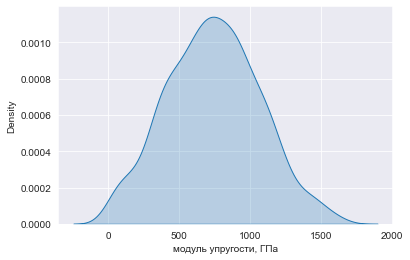

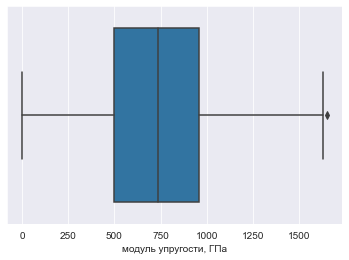

Минимальное значение:  2.4369087535075
Максимальное значение:  1649.41570587587
Среднее значение:  738.247626760584
Медианное значение:  738.736842105263



Количество отвердителя, м.%


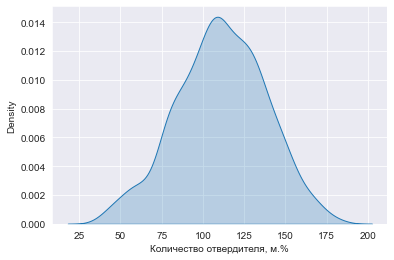

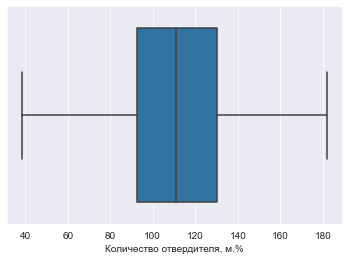

Минимальное значение:  38.6685003343557
Максимальное значение:  181.82844779488
Среднее значение:  110.91621571054407
Медианное значение:  111.11317502464999



Содержание эпоксидных групп,%_2


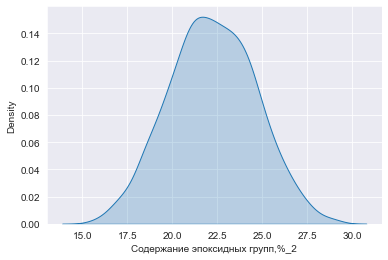

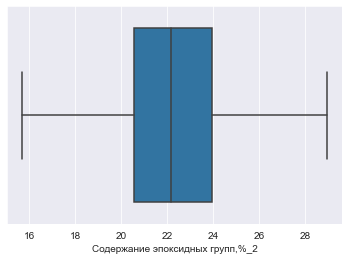

Минимальное значение:  15.6958938036288
Максимальное значение:  28.9550943746499
Среднее значение:  22.20903047048597
Медианное значение:  22.184712531998002



Температура вспышки, С_2


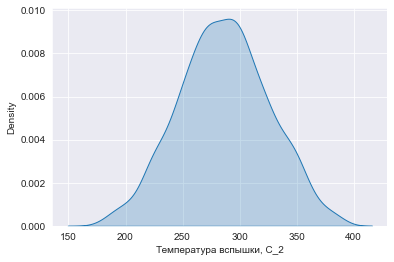

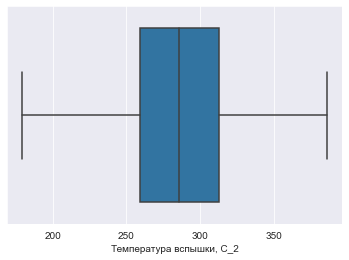

Минимальное значение:  179.37439137039
Максимальное значение:  386.067991779505
Среднее значение:  286.04041424804393
Медианное значение:  286.024117532195



Поверхностная плотность, г/м2


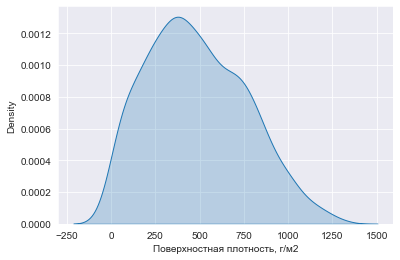

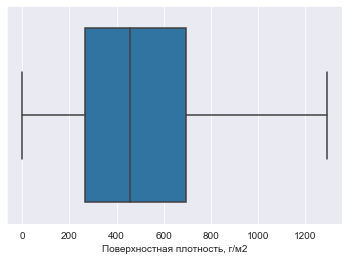

Минимальное значение:  0.603739925153945
Максимальное значение:  1291.34011463545
Среднее значение:  482.9939014162405
Медианное значение:  457.7322458016435



Модуль упругости при растяжении, ГПа


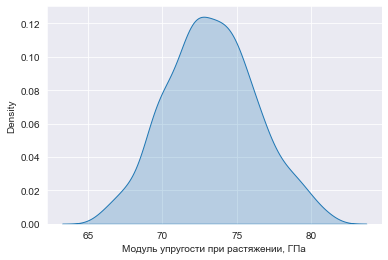

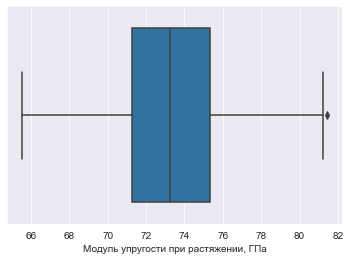

Минимальное значение:  65.5533359100584
Максимальное значение:  81.4171259444738
Среднее значение:  73.30512659759603
Медианное значение:  73.25922960132405



Прочность при растяжении, МПа


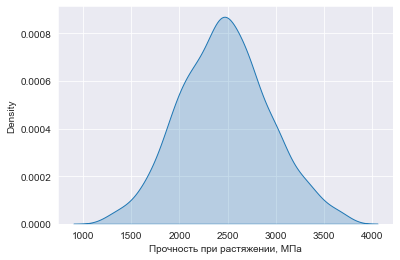

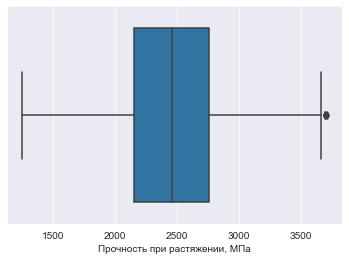

Минимальное значение:  1250.39280220501
Максимальное значение:  3705.67252336168
Среднее значение:  2467.488822012067
Медианное значение:  2457.9597673317303



Потребление смолы, г/м2


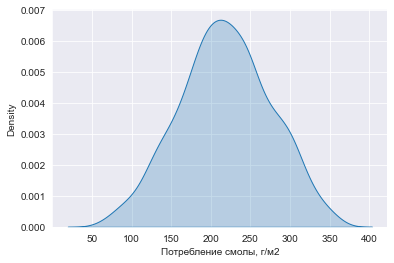

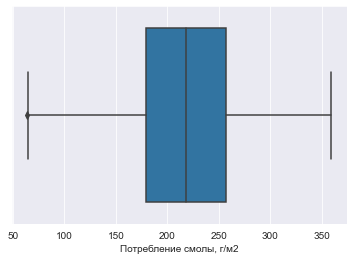

Минимальное значение:  63.6856983307984
Максимальное значение:  359.052219789673
Среднее значение:  217.61337420042463
Медианное значение:  218.388714705812



Угол нашивки, град


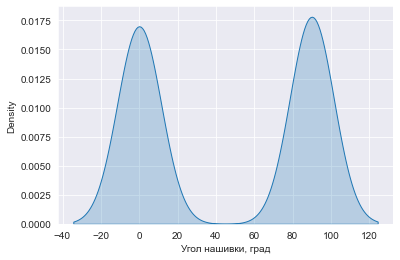

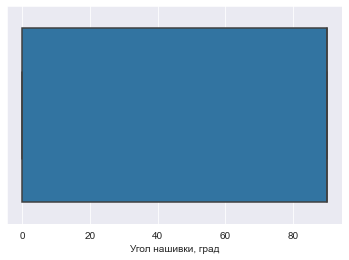

Минимальное значение:  0
Максимальное значение:  90
Среднее значение:  46.05769230769231
Медианное значение:  90.0



Шаг нашивки


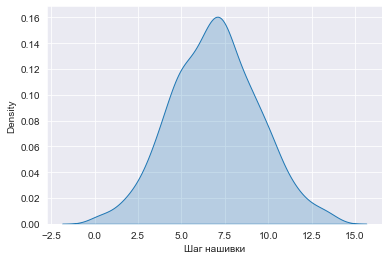

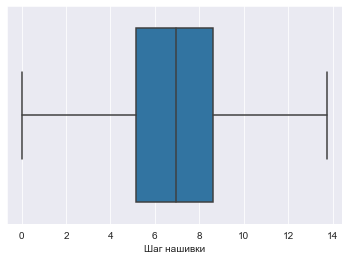

Минимальное значение:  0.0376389366987437
Максимальное значение:  13.732404403383
Среднее значение:  6.91558459970514
Медианное значение:  6.943336869815219



Плотность нашивки


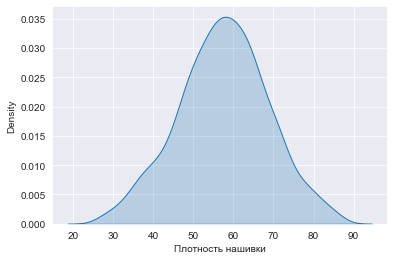

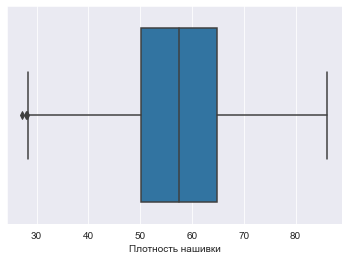

Минимальное значение:  27.2729280063294
Максимальное значение:  86.0124270098611
Среднее значение:  57.451895023129765
Медианное значение:  57.584224985771854





In [10]:
for colname in colnames:
    print(colname)
    
    #Гистограмма распределения
    sub_data2 = data_pure[colname]
    sns.set_style("darkgrid")
    sns.kdeplot(data=sub_data2, shade=True, palette='colorblind')
    plt.show()
    
    #Диаграмма "Ящик с усами"
    sns.boxplot(x=sub_data2);
    plt.show()
    
    #Значения (мин макс ср)
    print("Минимальное значение: ", end=" ")
    print(np.min(sub_data2))
    print("Максимальное значение: ", end=" ")
    print(np.max(sub_data2))
    print("Среднее значение: ", end=" ")
    print(np.mean(sub_data2))

    print("Медианное значение: ", end=" ")
    print(np.median(sub_data2))
    print("\n\n")

Строим диаграммы рассеивания

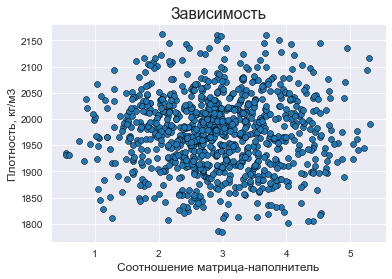

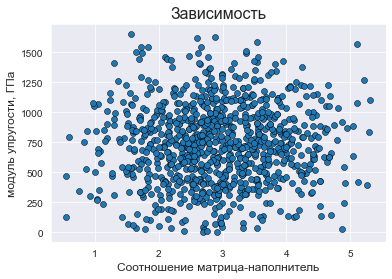

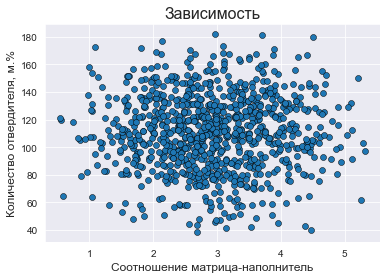

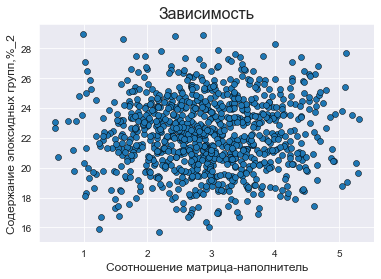

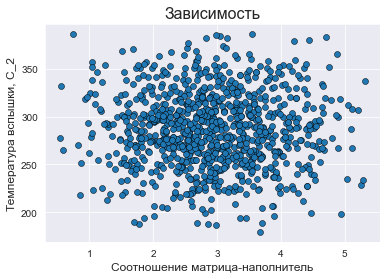

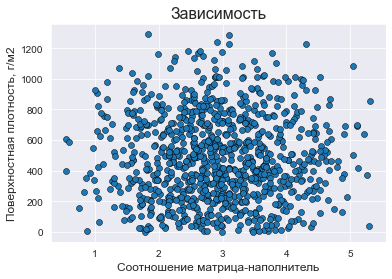

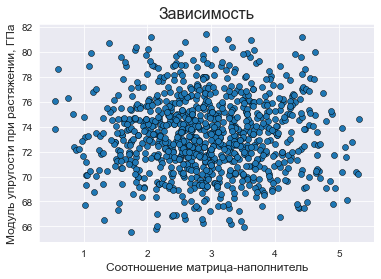

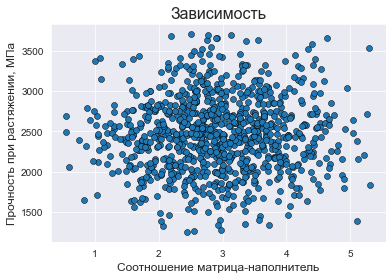

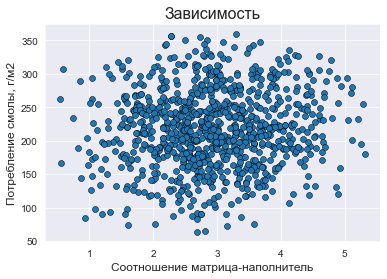

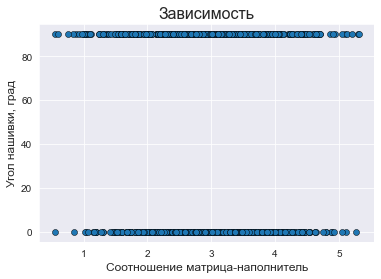

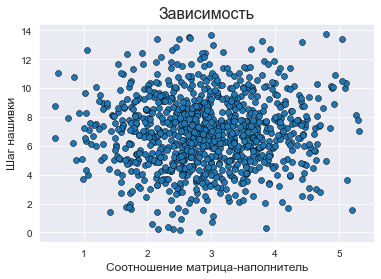

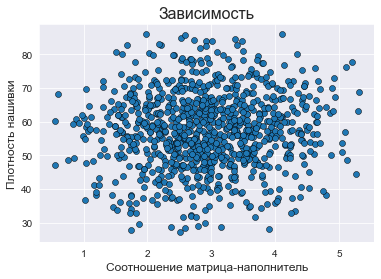

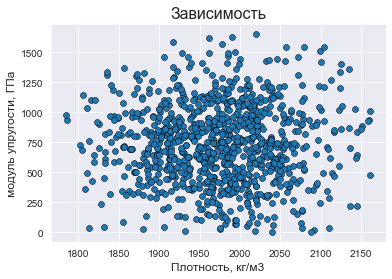

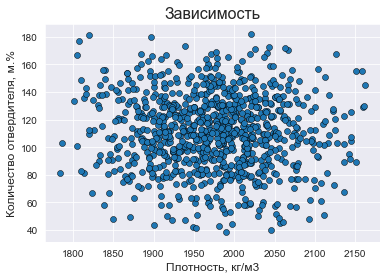

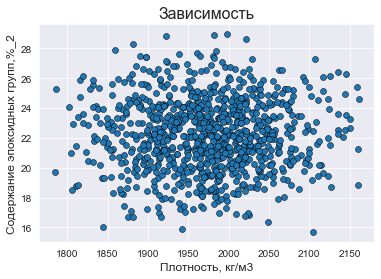

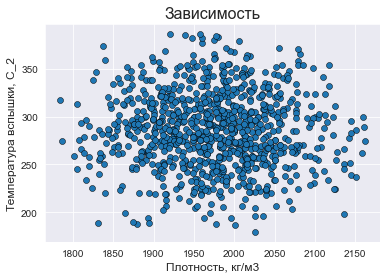

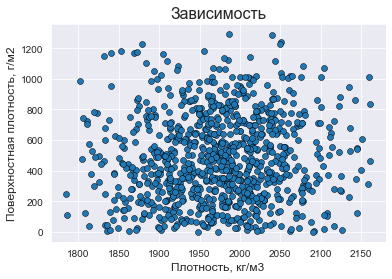

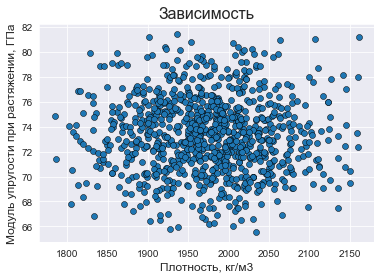

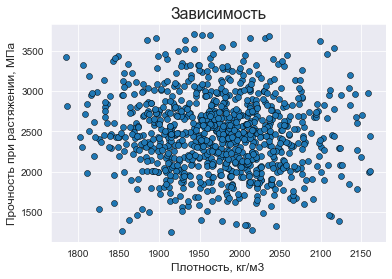

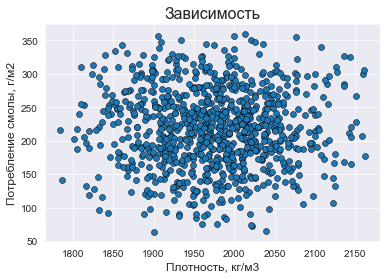

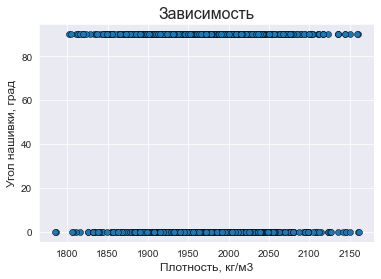

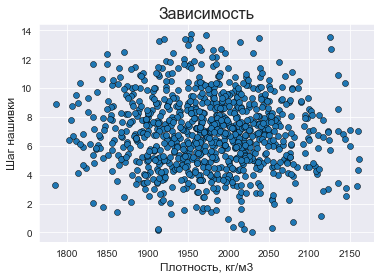

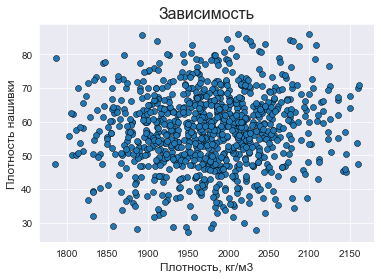

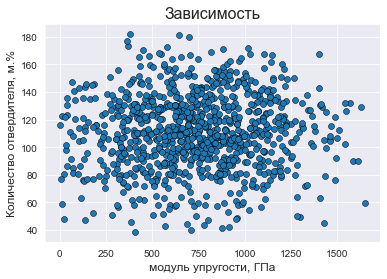

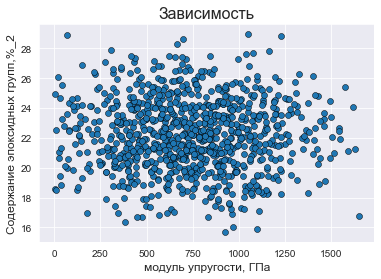

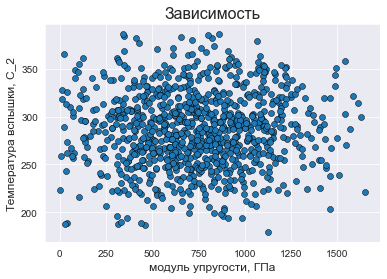

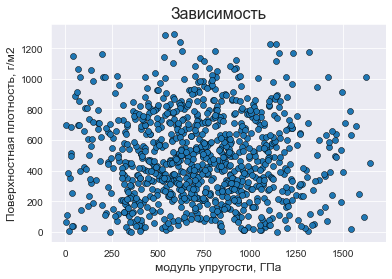

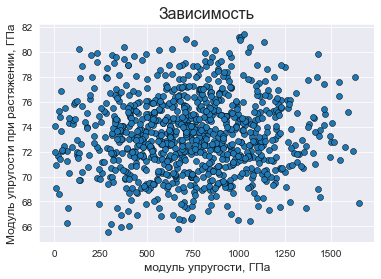

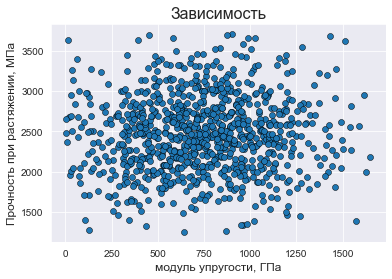

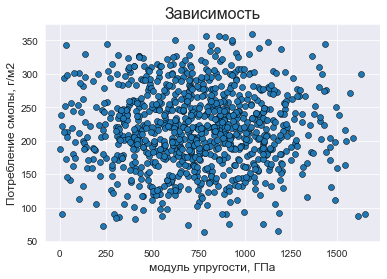

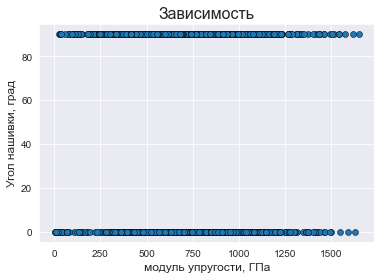

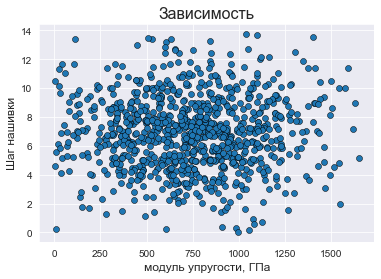

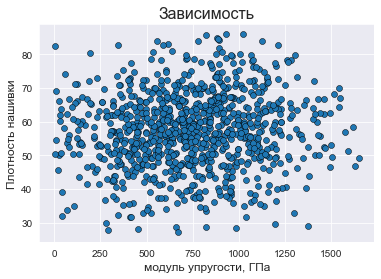

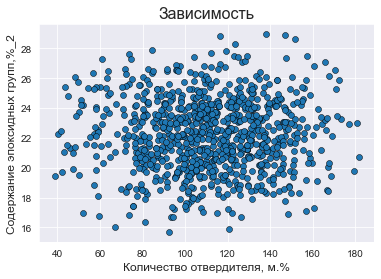

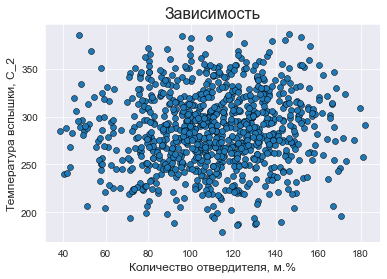

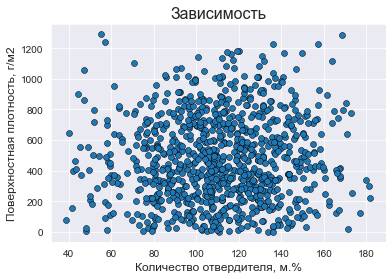

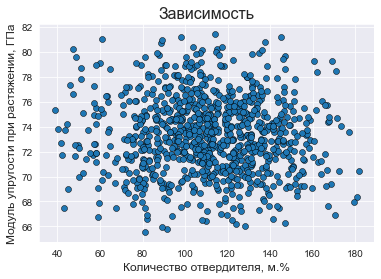

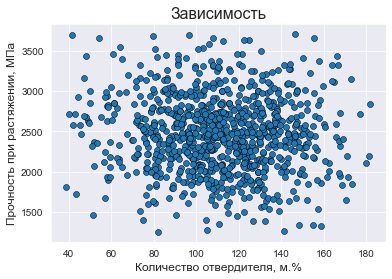

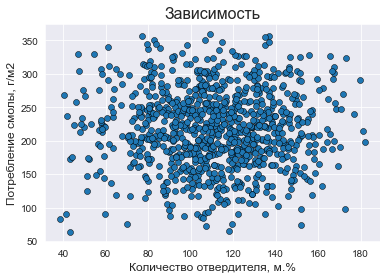

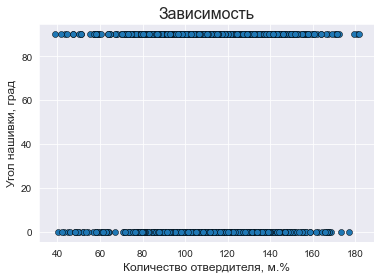

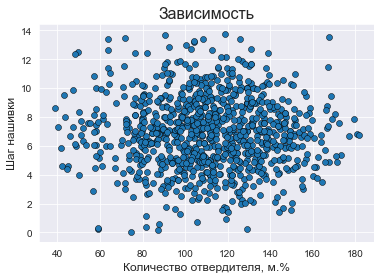

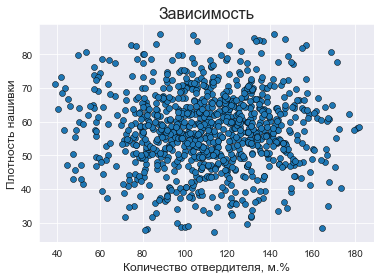

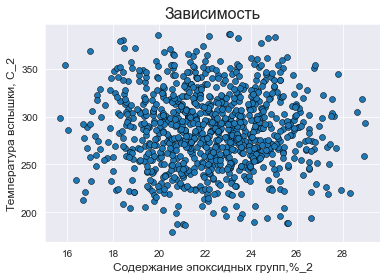

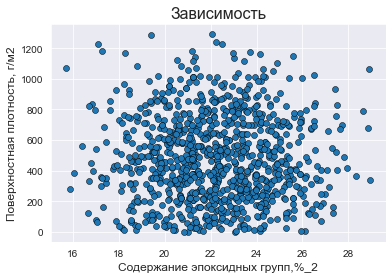

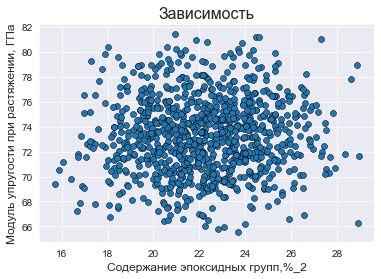

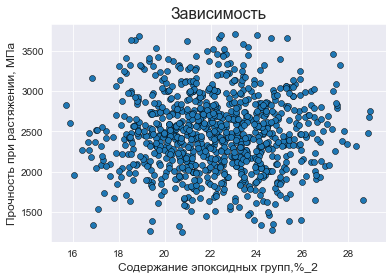

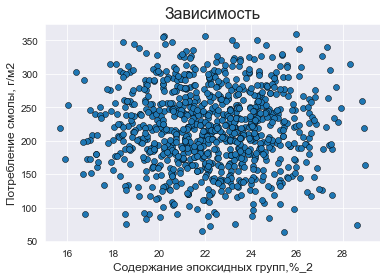

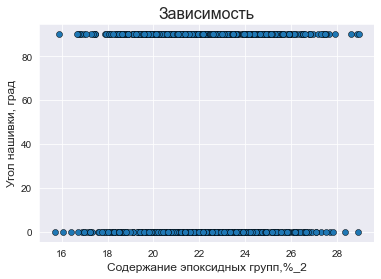

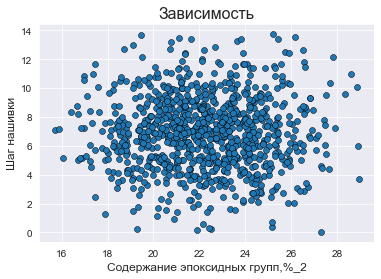

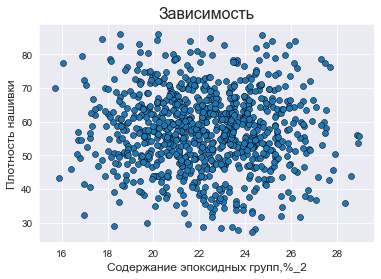

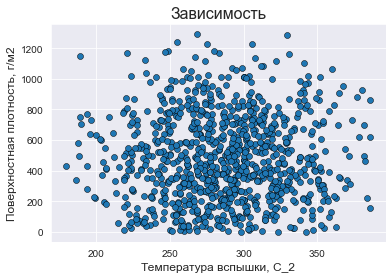

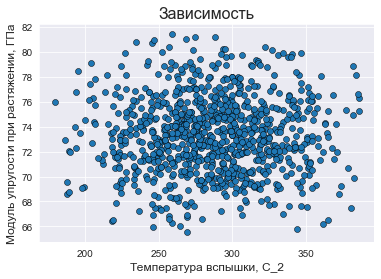

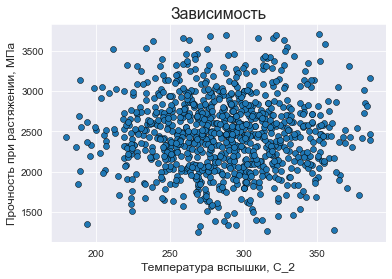

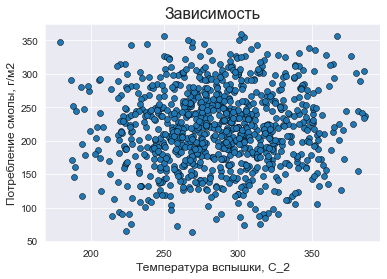

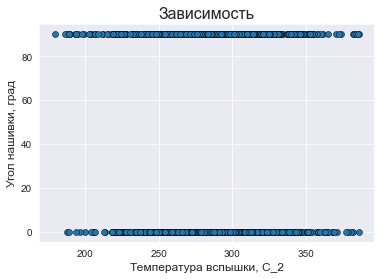

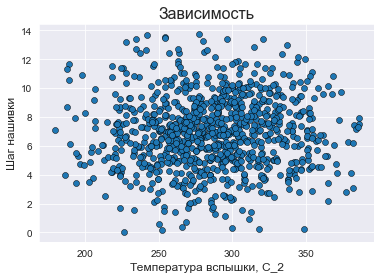

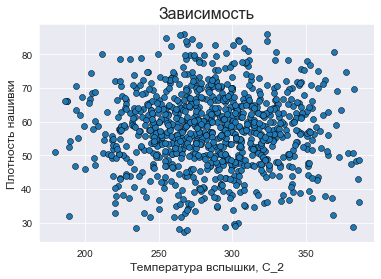

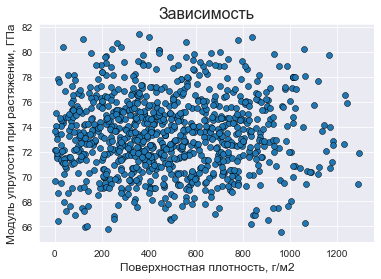

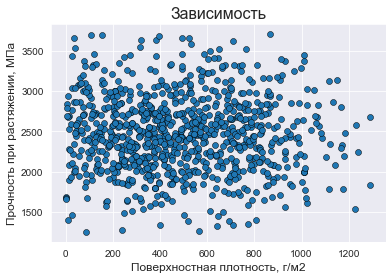

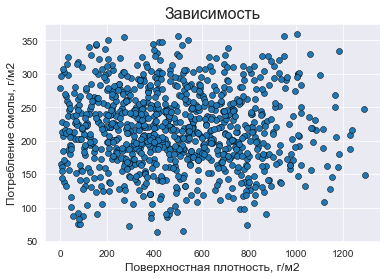

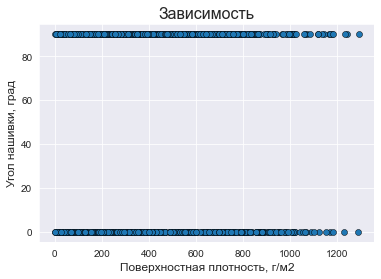

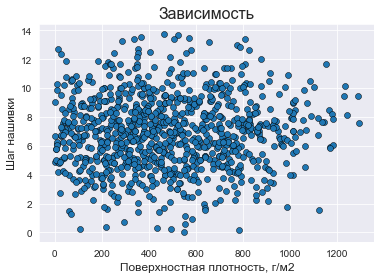

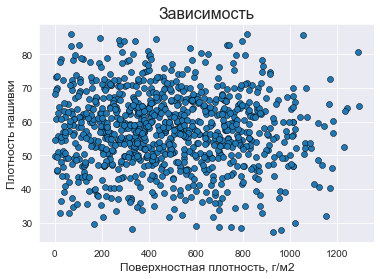

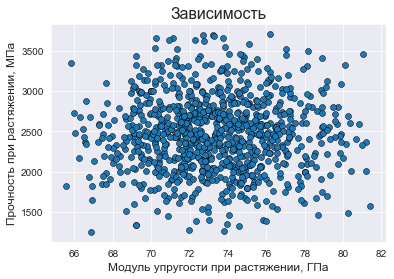

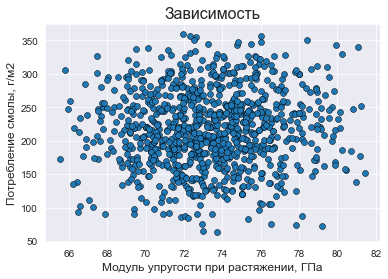

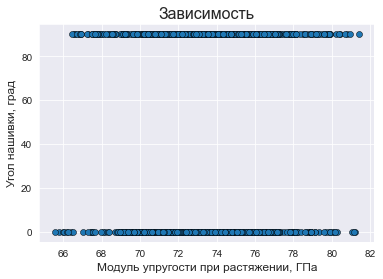

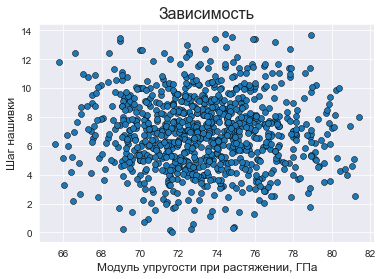

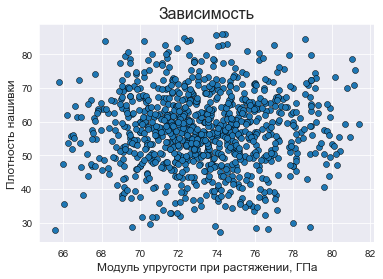

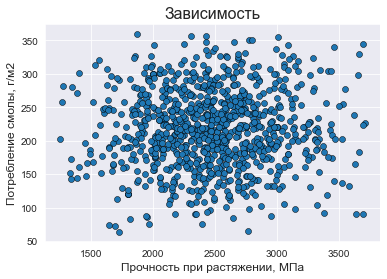

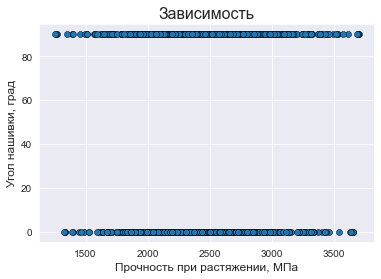

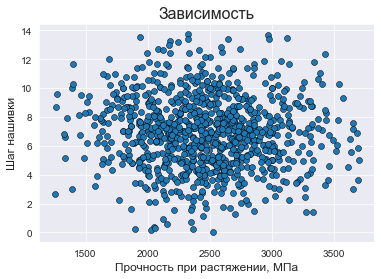

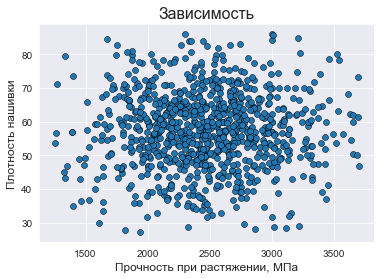

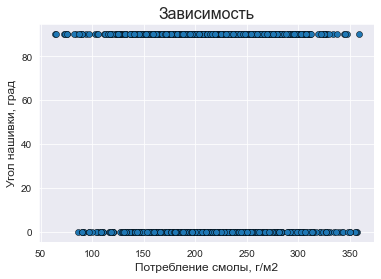

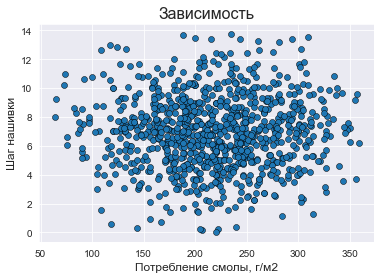

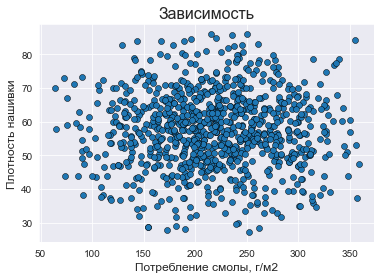

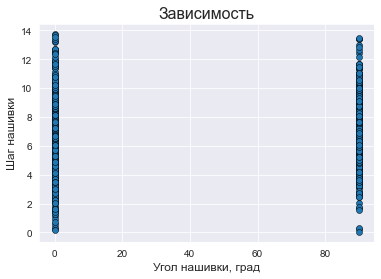

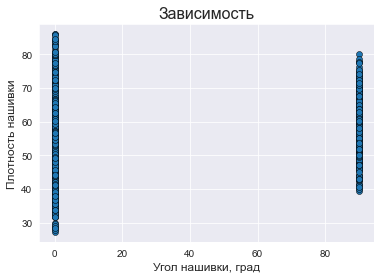

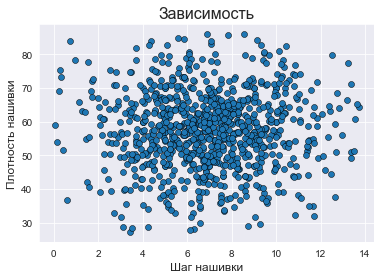

In [11]:
nmbr = 0
while nmbr < len(colnames):
    nmbr2 = nmbr+1
    while nmbr2 < len(colnames):
        sns.set_style('darkgrid')
        plt.title('Зависимость',size=16)
        plt.xlabel(colnames[nmbr],size=12)
        plt.ylabel(colnames[nmbr2],size=12)
        sns.scatterplot(x=colnames[nmbr], y=colnames[nmbr2], data=data_pure, edgecolor='black', palette='cubehelix')
        plt.show()
        nmbr2 += 1
    nmbr += 1

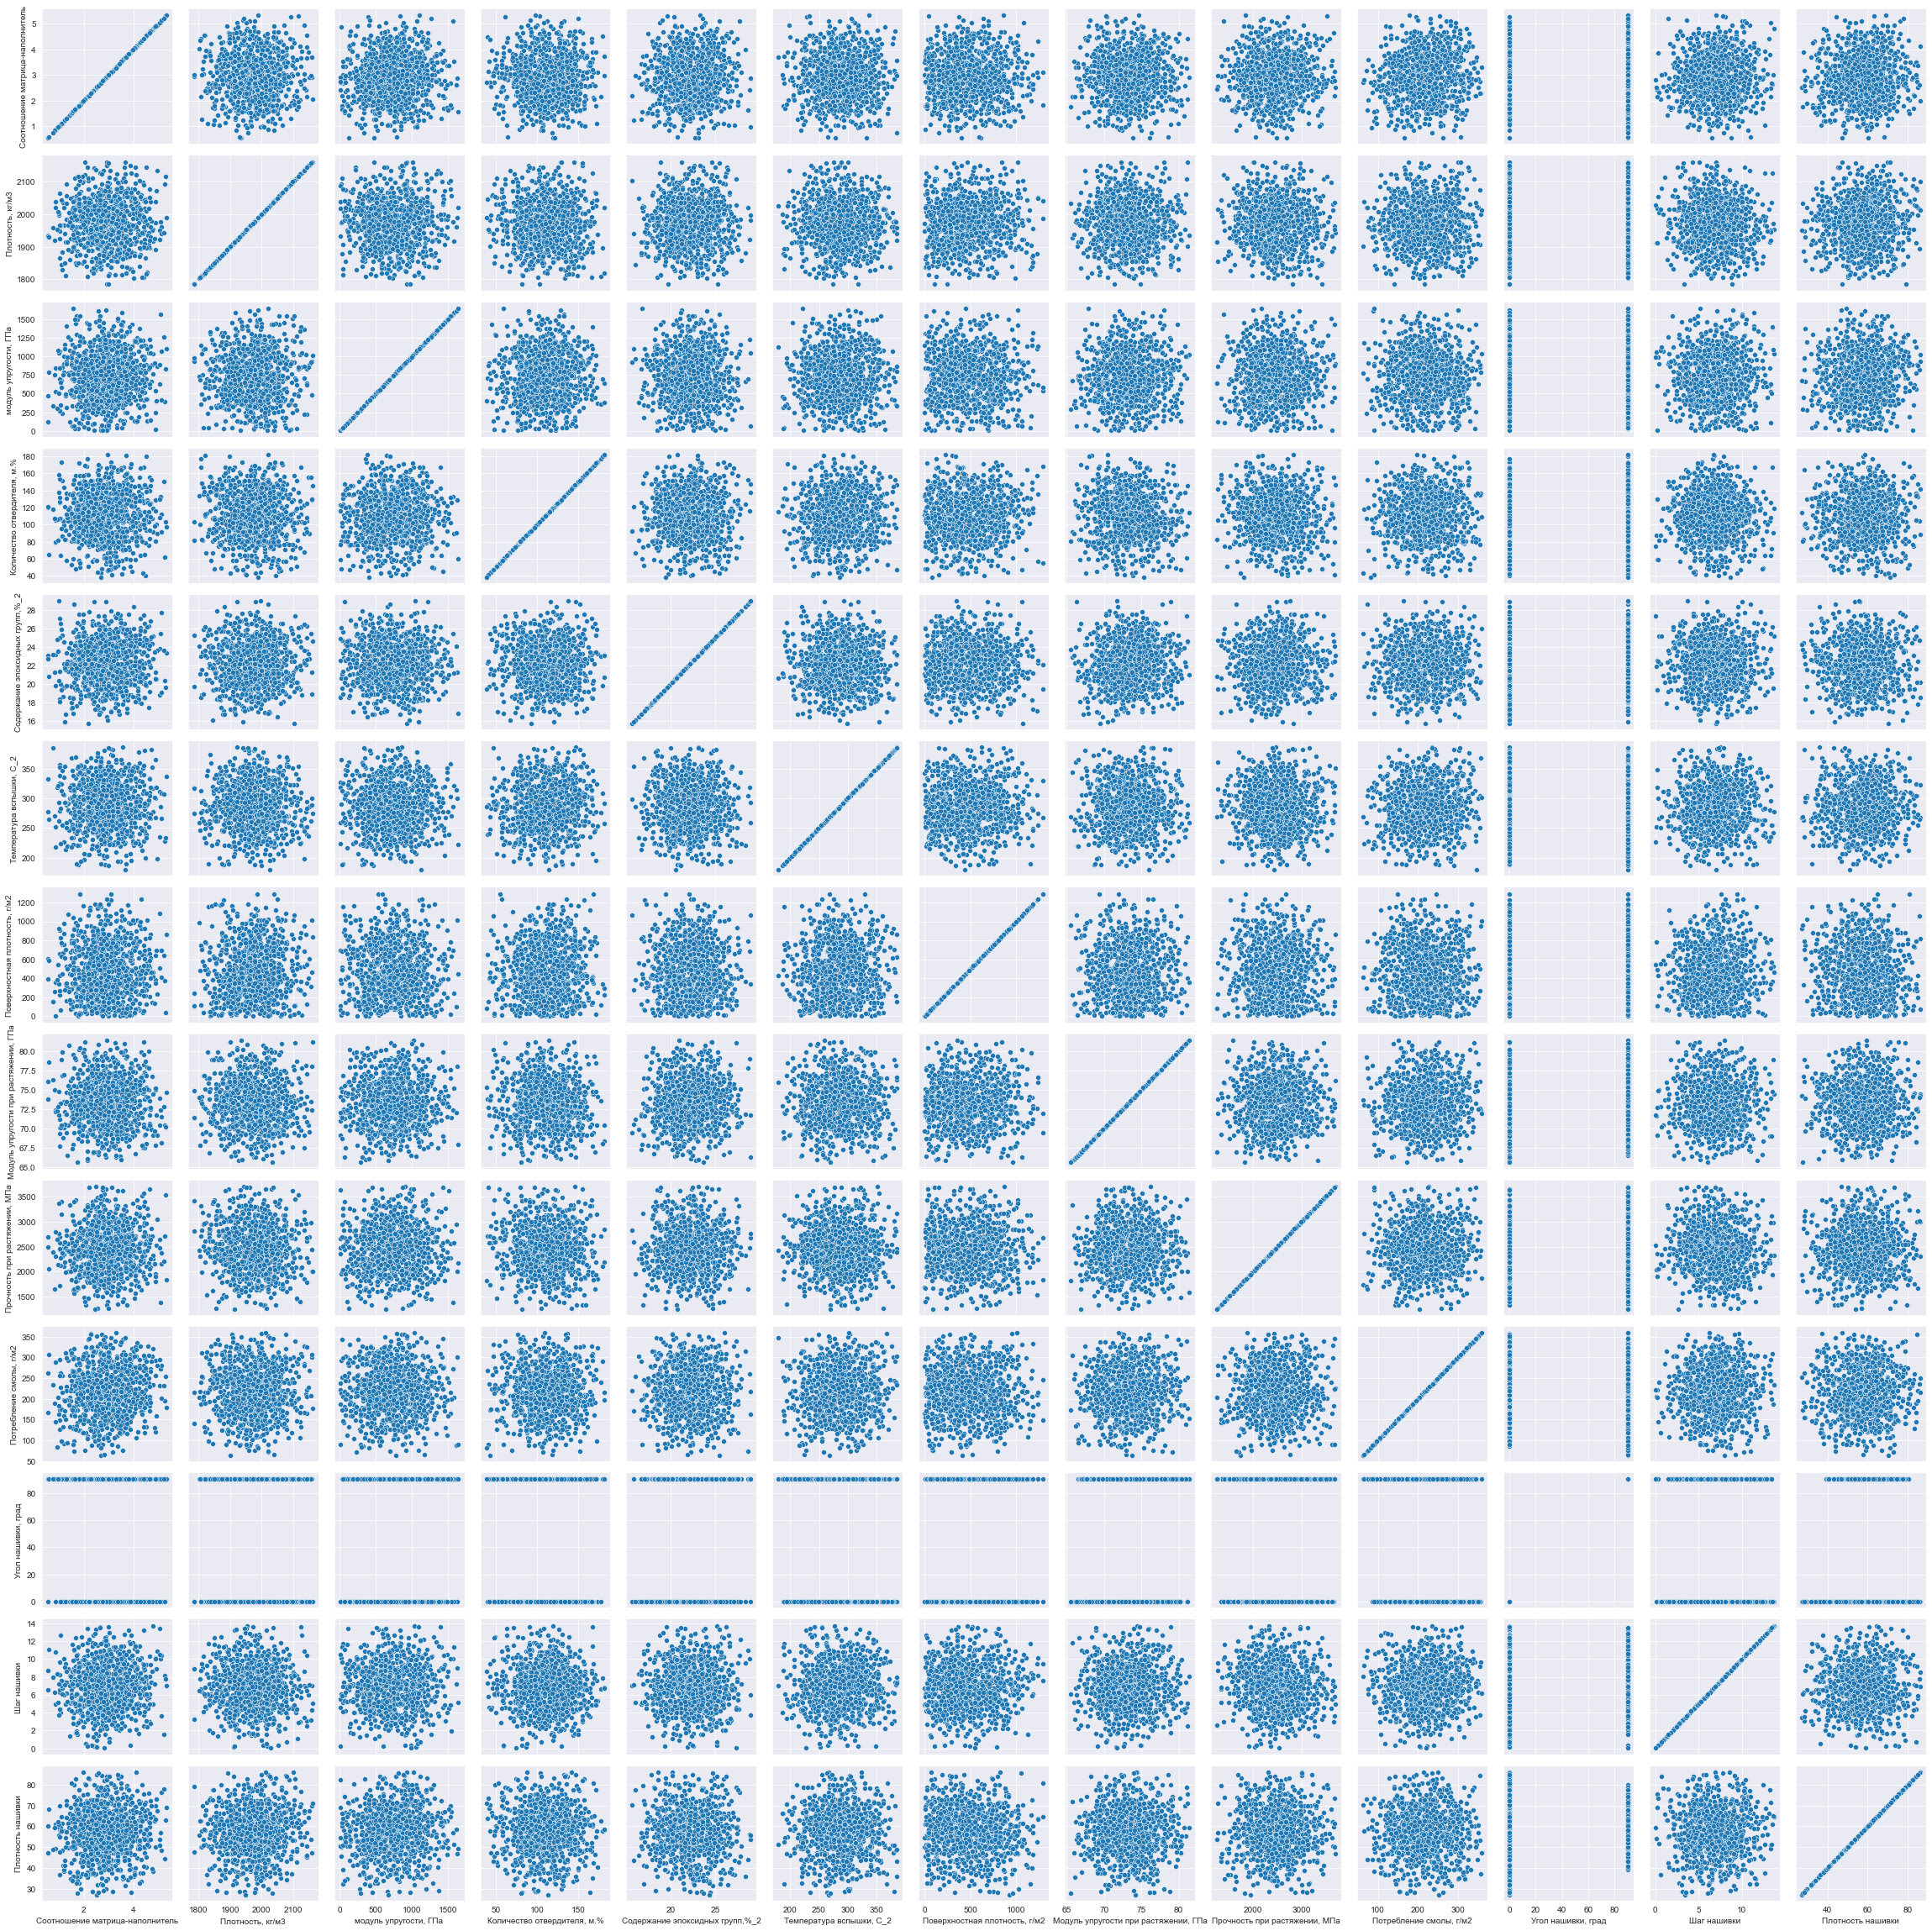

In [12]:
sns.PairGrid(data_pure[colnames]).map(sns.scatterplot) #попарный график зависимости

<AxesSubplot:>

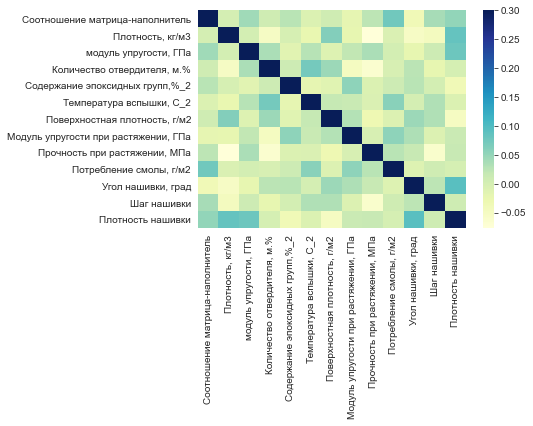

In [13]:
sns.heatmap(data_pure[colnames].corr(), vmax=0.3, cmap="YlGnBu") #График корелляции

Нормализация данных

In [14]:
minmaxscalar = preprocessing.MinMaxScaler()
col = colnames
result = minmaxscalar.fit_transform(data_pure)
data_norm = pd.DataFrame(result, columns=col)
data_norm

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           0.274768          0.651097               0.447061   
1                           0.274768          0.651097               0.447061   
2                           0.466552          0.651097               0.455721   
3                           0.465836          0.571539               0.452685   
4                           0.424236          0.332865               0.488508   
..                               ...               ...                    ...   
931                         0.361662          0.444480               0.552781   
932                         0.607674          0.704373               0.268550   
933                         0.573391          0.498274               0.251612   
934                         0.662497          0.748688               0.448724   
935                         0.684036          0.280923               0.251903   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       0.079153                         0.607435   
1                       0.630983                         0.418887   
2                       0.511257                         0.495653   
3                       0.511257                         0.495653   
4                       0.511257                         0.495653   
..                           ...                              ...   
931                     0.337550                         0.333908   
932                     0.749605                         0.294428   
933                     0.501991                         0.623085   
934                     0.717585                         0.267818   
935                     0.632264                         0.888354   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                    0.509164                       0.162230   
1                    0.583596                       0.162230   
2                    0.509164                       0.162230   
3                    0.509164                       0.162230   
4                    0.509164                       0.162230   
..                        ...                            ...   
931                  0.703458                       0.161609   
932                  0.362087                       0.271207   
933                  0.334063                       0.572959   
934                  0.466417                       0.496511   
935                  0.588206                       0.587373   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                0.280303                       0.712590   
1                                0.280303                       0.712590   
2                                0.280303                       0.712590   
3                                0.280303                       0.712590   
4                                0.280303                       0.712590   
..                                    ...                            ...   
931                              0.475147                       0.463043   
932                              0.464422                       0.452087   
933                              0.578740                       0.575296   
934                              0.535142                       0.334513   
935                              0.551972                       0.654075   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                   0.529221                 0.0     0.289334   
1                   0.529221                 0.0     0.362355   
2                   0.529221                 0.0     0.362355   
3                   0.529221                 0.0     0.362355   
4                   0.529221                 0.0     0.362355   
..                       ...                 ...          ...   
931                 0.207613                 1.0     0.660014   
9

# Обучение нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении

## Подготовка

Импорт библиотек для построения моделей

In [15]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Flatten
from keras.losses import SparseCategoricalCrossentropy

from numpy.random import seed

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

Входные и выходные параметры (на выходе "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа")

In [16]:
input_colnames_mod = ["Соотношение матрица-наполнитель",
                      "Плотность, кг/м3",
                      "модуль упругости, ГПа",
                      "Количество отвердителя, м.%",
                      "Содержание эпоксидных групп,%_2",
                      "Температура вспышки, С_2",
                      "Поверхностная плотность, г/м2",
                      "Потребление смолы, г/м2",
                      "Угол нашивки, град",
                      "Шаг нашивки",
                      "Плотность нашивки"]

output_colnames_mod = ["Модуль упругости при растяжении, ГПа",
                       "Прочность при растяжении, МПа"]

in_train_mod = data_norm[input_colnames_mod] #Массив на вход
out_train_mod = data_norm[output_colnames_mod] #Массив на выход
out_train_mod

Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа
0                                0.280303                       0.712590
1                                0.280303                       0.712590
2                                0.280303                       0.712590
3                                0.280303                       0.712590
4                                0.280303                       0.712590
..                                    ...                            ...
931                              0.475147                       0.463043
932                              0.464422                       0.452087
933                              0.578740                       0.575296
934                              0.535142                       0.334513
935                              0.551972                       0.654075

[936 rows x 2 columns]

In [17]:
in_train_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Соотношение матрица-наполнитель  936 non-null    float64
 1   Плотность, кг/м3                 936 non-null    float64
 2   модуль упругости, ГПа            936 non-null    float64
 3   Количество отвердителя, м.%      936 non-null    float64
 4   Содержание эпоксидных групп,%_2  936 non-null    float64
 5   Температура вспышки, С_2         936 non-null    float64
 6   Поверхностная плотность, г/м2    936 non-null    float64
 7   Потребление смолы, г/м2          936 non-null    float64
 8   Угол нашивки, град               936 non-null    float64
 9   Шаг нашивки                      936 non-null    float64
 10  Плотность нашивки                936 non-null    float64
dtypes: float64(11)
memory usage: 80.6 KB


In [18]:
out_train_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Модуль упругости при растяжении, ГПа  936 non-null    float64
 1   Прочность при растяжении, МПа         936 non-null    float64
dtypes: float64(2)
memory usage: 14.8 KB


Подготовка обучающей и тестовой выборки

In [19]:
train1, test1, train2, test2 = train_test_split(in_train_mod, out_train_mod, test_size=0.3)

## Построение нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении.

Создаем список моделей

In [20]:
models = [LinearRegression(),          # метод наименьших квадратов 
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
          KNeighborsRegressor(n_neighbors=123), # метод ближайших соседей
          SVR(kernel='linear'),        # метод опорных векторов с линейным ядром
          GradientBoostingRegressor()] #Метод градиентного бустинга

Создаем цикл с проверкой различных моделей

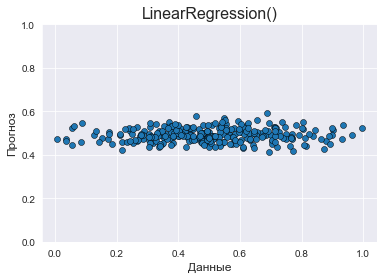

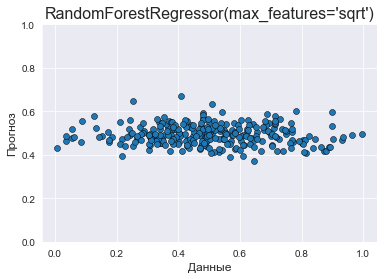

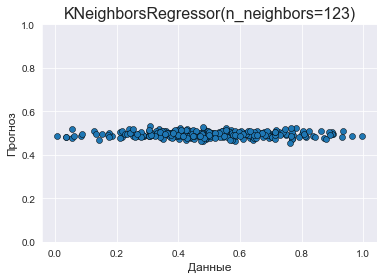

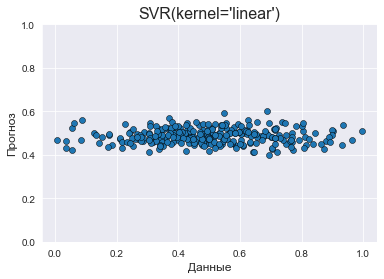

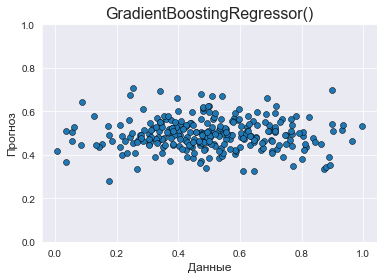

R2_Y1     R2_Y2
Model                                        
LinearRegression          -0.014260 -0.015108
RandomForestRegressor     -0.046101 -0.091691
KNeighborsRegressor        0.000355 -0.006771
SVR                       -0.022158 -0.033866
GradientBoostingRegressor -0.117060 -0.137254

In [21]:
models_prov = pd.DataFrame() #создаем двумерный массив
models_results = pd.DataFrame()
tmp = {} #временный словарь
tmp2 = {}
for model in models:      #цикл перебора моделей
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    tmp2['Model'] = m[:m.index('(')]
    
    for i in range(train2.shape[1]): #цикл проверки модели
        model.fit(train1, train2[output_colnames_mod[i]])  #обучаем модель
        tmp['R2_Y%s'%str(i+1)] = r2_score(test2[output_colnames_mod[i]], model.predict(test1))#считаем коэффициент детерминации
        #Создадим датасет с тестовыми данными и прогнозными значениями для каждой модели
        tmp2 = pd.DataFrame({'Данные': test2[output_colnames_mod[i]],'Прогноз': model.predict(test1)})   
        
    models_prov = models_prov.append([tmp]) #добавляем данные и итоговый массив
    models_results = tmp2 
    #Выведем график рассеяния. В случае идеального прогноза график походил бы на прямую
    sns.set_style('darkgrid')
    plt.title( model, size=16)
    plt.xlabel('Данные',size=12)
    plt.ylabel('Прогноз',size=12)
    plt.ylim(0, 1)
    sns.scatterplot(x='Данные', y='Прогноз', data=models_results, edgecolor='black', palette='cubehelix')
    plt.show()
    
models_prov.set_index('Model', inplace=True) #делаем индекс по названию модели
models_prov

# Построение Модели MLP для параметра Модуль упругости при растяжении, ГПа

Указываем входные/выходные переменные

In [22]:
input_colnames2 = ["Плотность, кг/м3",
                  "модуль упругости, ГПа",
                  "Количество отвердителя, м.%",
                  "Содержание эпоксидных групп,%_2",
                  "Температура вспышки, С_2",
                  "Поверхностная плотность, г/м2",
                  "Потребление смолы, г/м2",
                  "Угол нашивки, град",
                  "Шаг нашивки",
                  "Плотность нашивки",
                  "Соотношение матрица-наполнитель",
                   "Прочность при растяжении, МПа"]

output_colnames2 = ["Модуль упругости при растяжении, ГПа"]

X_train2 = data_norm[input_colnames2]
Y_train2 = data_norm[output_colnames2]
X_train2.info()
Y_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Плотность, кг/м3                 936 non-null    float64
 1   модуль упругости, ГПа            936 non-null    float64
 2   Количество отвердителя, м.%      936 non-null    float64
 3   Содержание эпоксидных групп,%_2  936 non-null    float64
 4   Температура вспышки, С_2         936 non-null    float64
 5   Поверхностная плотность, г/м2    936 non-null    float64
 6   Потребление смолы, г/м2          936 non-null    float64
 7   Угол нашивки, град               936 non-null    float64
 8   Шаг нашивки                      936 non-null    float64
 9   Плотность нашивки                936 non-null    float64
 10  Соотношение матрица-наполнитель  936 non-null    float64
 11  Прочность при растяжении, МПа    936 non-null    float64
dtypes: float64(12)
memory 

Подготовка обучающей выборки

In [23]:
Xtrn2, Xtest2, Ytrn2, Ytest2 = train_test_split(X_train2, Y_train2, test_size=0.3) #размер тестовой выборки 30%

Сборка модели

In [24]:
model3 = Sequential([
    Dense(12, activation = 'relu', input_dim=12),
    Dense(24, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(12, activation = 'relu'),
    Dense(12, activation = 'relu'),
    Dense(12, activation = 'relu'),
    Dense(10, activation = 'relu'),
    Dense(5, activation = 'relu'),
    Dense(1)])

model3.compile(optimizer='adam', 
              loss='mse', 
              metrics=['mae'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 24)                600       
                                                                 
 dense_6 (Dense)             (None, 24)                6

Обучение модели и получение точности прелсказания на тестовом множестве

In [25]:
model3.fit(Xtrn2, Ytrn2, epochs=90) #обучение модели

Epoch 1/90
21/21 [==============================] - 2s 4ms/step - loss: 0.1730 - mae: 0.3601
Epoch 2/90
21/21 [==============================] - 0s 3ms/step - loss: 0.0433 - mae: 0.1655
Epoch 3/90
21/21 [==============================] - 0s 3ms/step - loss: 0.0375 - mae: 0.1560
Epoch 4/90
21/21 [==============================] - 0s 3ms/step - loss: 0.0372 - mae: 0.1557
Epoch 5/90
21/21 [==============================] - 0s 3ms/step - loss: 0.0369 - mae: 0.1550
Epoch 6/90
21/21 [==============================] - 0s 3ms/step - loss: 0.0369 - mae: 0.1548
Epoch 7/90
21/21 [==============================] - 0s 3ms/step - loss: 0.0367 - mae: 0.1543
Epoch 8/90
21/21 [==============================] - 0s 3ms/step - loss: 0.0365 - mae: 0.1541
Epoch 9/90
21/21 [==============================] - 0s 3ms/step - loss: 0.0371 - mae: 0.1542
Epoch 10/90
21/21 [==============================] - 0s 3ms/step - loss: 0.0372 - mae: 0.1547
Epoch 11/90
21/21 [==============================] - 0s 3ms/step - lo

21/21 [==============================] - 0s 3ms/step - loss: 0.0279 - mae: 0.1329
Epoch 89/90
21/21 [==============================] - 0s 4ms/step - loss: 0.0289 - mae: 0.1344
Epoch 90/90
21/21 [==============================] - 0s 4ms/step - loss: 0.0287 - mae: 0.1345


In [26]:
model3.evaluate(Xtest2, Ytest2) #проверяем на тестовом множестве

9/9 [==============================] - 0s 1ms/step - loss: 0.0445 - mae: 0.1659


[0.04445609450340271, 0.16590873897075653]

In [27]:
predict_model3 =  model3.predict(Xtest2) #получаем предсказанные данные
predict_values2 = np.ravel(predict_model3) #превращаем в многомерный массив
predict_values2

array([0.60598654, 0.41255254, 0.4004251 , 0.42627382, 0.598319  ,
       0.56134415, 0.45144457, 0.47785732, 0.48529786, 0.55969226,
       0.5347661 , 0.37516195, 0.37041503, 0.45175081, 0.5383842 ,
       0.43414506, 0.45480692, 0.5093618 , 0.6007121 , 0.46494326,
       0.40000165, 0.4393542 , 0.39200258, 0.5093384 , 0.4302338 ,
       0.376951  , 0.48813847, 0.3704015 , 0.46574542, 0.4833574 ,
       0.54331917, 0.46048588, 0.5215947 , 0.58843744, 0.46267352,
       0.3808644 , 0.45702124, 0.4548162 , 0.5735934 , 0.35143176,
       0.47084117, 0.3807324 , 0.49911815, 0.3622523 , 0.55576885,
       0.47119397, 0.35855365, 0.6264218 , 0.5691578 , 0.65996873,
       0.48501164, 0.3381544 , 0.5046327 , 0.5260825 , 0.39317858,
       0.5713288 , 0.59984946, 0.5373642 , 0.46949196, 0.4790332 ,
       0.5272068 , 0.48252317, 0.56257445, 0.5002942 , 0.51497537,
       0.49111146, 0.5328016 , 0.4556496 , 0.32654744, 0.58191156,
       0.45790613, 0.5008996 , 0.40951112, 0.47550526, 0.46785

In [28]:
Ytest_values2 = np.ravel(Ytest2.copy())
Ytest_values2

array([0.70017941, 0.69450567, 0.50081079, 0.39795991, 0.85451129,
       0.65109327, 0.82861725, 0.575039  , 0.51150816, 0.28030276,
       0.68659827, 0.33084232, 0.24147326, 0.38779908, 0.59985457,
       0.51920032, 0.47898755, 0.27071055, 0.98475173, 0.1693059 ,
       0.82233355, 0.23099065, 0.23082807, 0.48635721, 0.93713586,
       0.25511349, 0.79362948, 0.59548595, 0.34398554, 0.30701986,
       0.42791186, 0.73118912, 0.28030276, 0.68620611, 0.41191031,
       0.67549765, 0.51340143, 0.53482179, 0.3336544 , 0.41865444,
       0.87602721, 0.6157269 , 0.43862362, 0.58158895, 0.52942021,
       0.36269116, 0.50807989, 0.41058774, 0.62693265, 0.71643997,
       0.32278852, 0.28063357, 0.85665875, 0.41403835, 0.33456067,
       0.73758281, 0.72406496, 0.51520208, 0.10973047, 0.25588347,
       0.54852653, 0.60397079, 0.46628474, 0.60733315, 0.73235169,
       0.05856399, 0.64715848, 0.34165492, 0.3950046 , 0.64317969,
       0.61021992, 0.3946    , 0.61315713, 0.45643617, 0.12277

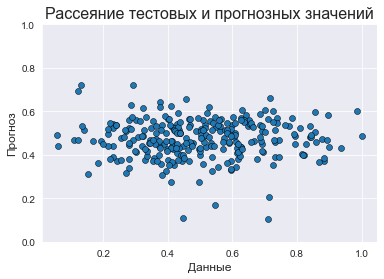

Данные   Прогноз
0    0.700179  0.605987
1    0.694506  0.412553
2    0.500811  0.400425
3    0.397960  0.426274
4    0.854511  0.598319
..        ...       ...
276  0.426621  0.432907
277  0.558222  0.558671
278  0.457020  0.453515
279  0.198861  0.449031
280  0.616724  0.447963

[281 rows x 2 columns]

In [30]:
#Создадим датасет с тестовыми данными и прогнозными значениями
feature_results2 = pd.DataFrame({'Данные': Ytest_values2,'Прогноз': predict_values2})
#Выведем график рассеяния. В случае идеального прогноза график походил бы на прямую
sns.set_style('darkgrid')
plt.title('Рассеяние тестовых и прогнозных значений',size=16)
plt.xlabel('Данные',size=12)
plt.ylabel('Прогноз',size=12)
sns.scatterplot(x='Данные', y='Прогноз', data=feature_results2, edgecolor='black', palette='cubehelix')
plt.ylim(0, 1)
plt.show()
feature_results2

# Построение Модели MLP для параметра Соотношение матрица-наполнитель

Указываем входные/выходные переменные

In [31]:
input_colnames = ["Плотность, кг/м3",
                  "модуль упругости, ГПа",
                  "Количество отвердителя, м.%",
                  "Содержание эпоксидных групп,%_2",
                  "Температура вспышки, С_2",
                  "Поверхностная плотность, г/м2",
                  "Потребление смолы, г/м2",
                  "Угол нашивки, град",
                  "Шаг нашивки",
                  "Плотность нашивки",
                  "Модуль упругости при растяжении, ГПа",
                  "Прочность при растяжении, МПа"]

output_colnames = ["Соотношение матрица-наполнитель"]

X_train = data_norm[input_colnames]
Y_train = data_norm[output_colnames]
X_train.info()
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Плотность, кг/м3                      936 non-null    float64
 1   модуль упругости, ГПа                 936 non-null    float64
 2   Количество отвердителя, м.%           936 non-null    float64
 3   Содержание эпоксидных групп,%_2       936 non-null    float64
 4   Температура вспышки, С_2              936 non-null    float64
 5   Поверхностная плотность, г/м2         936 non-null    float64
 6   Потребление смолы, г/м2               936 non-null    float64
 7   Угол нашивки, град                    936 non-null    float64
 8   Шаг нашивки                           936 non-null    float64
 9   Плотность нашивки                     936 non-null    float64
 10  Модуль упругости при растяжении, ГПа  936 non-null    float64
 11  Прочность при растя

Подготовка обучающей выборки

In [32]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X_train, Y_train, test_size=0.2) #размер тестовой выборки 20%

In [33]:
#def model1(lyrs=[128], act='relu', opt='Nadam', dr=0.0):
#    model = Sequential()
#    
#    # создаем первый скрытый слой
#    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
#    
#    # создаем дополнительные скрытые слои (128)
#    for i in range(1,len(lyrs)):
#        model.add(Dense(lyrs[i], activation=act))
#    
#    # add dropout, default is none
#    model.add(Dropout(dr))
#    
#    # создаем выходной слой
#    model.add(Dense(3, activation='sigmoid'))  # output layer
#    
#    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# 
#    return model

Сборка модели

In [56]:
model2 = Sequential([
    Dense(12, activation = 'relu', input_dim=12),
    Dense(90, activation = 'relu'),
    Dense(80, activation = 'relu'),
    Dense(70, activation = 'relu'),
    Dense(60, activation = 'relu'),
    Dense(50, activation = 'relu'),
    Dense(50, activation = 'relu'),
    Dense(50, activation = 'relu'),
    Dense(40, activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(20, activation = 'relu'),
    Dense(10, activation = 'relu'),
    Dense(5, activation = 'relu'),
    Dense(3, activation = 'relu'),
    Dense(1)])

model2.compile(optimizer='adam', 
              loss='mse', 
              metrics=['mae'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 12)                156       
                                                                 
 dense_35 (Dense)            (None, 90)                1170      
                                                                 
 dense_36 (Dense)            (None, 80)                7280      
                                                                 
 dense_37 (Dense)            (None, 70)                5670      
                                                                 
 dense_38 (Dense)            (None, 60)                4260      
                                                                 
 dense_39 (Dense)            (None, 50)                3050      
                                                                 
 dense_40 (Dense)            (None, 50)               

Обучение модели и получение точности прелсказания на тестовом множестве

In [57]:
model2.fit(Xtrn, Ytrn, epochs=50) #обучение модели

Epoch 1/50
24/24 [==============================] - 1s 4ms/step - loss: 0.1996 - mae: 0.3986
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0422 - mae: 0.1646
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0364 - mae: 0.1542
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0366 - mae: 0.1542
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0353 - mae: 0.1514
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0369 - mae: 0.1546
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0362 - mae: 0.1528
Epoch 8/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0348 - mae: 0.1500
Epoch 9/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0353 - mae: 0.1518
Epoch 10/50
24/24 [==============================] - 0s 3ms/step - loss: 0.0350 - mae: 0.1509
Epoch 11/50
24/24 [==============================] - 0s 3ms/step - lo

In [58]:
model2.evaluate(Xtest, Ytest) #проверяем на тестовом множестве

6/6 [==============================] - 0s 3ms/step - loss: 0.0388 - mae: 0.1599


[0.038827043026685715, 0.15994855761528015]

In [59]:
predict_model2 =  model2.predict(Xtest) #получаем предсказанные данные
predict_values = np.ravel(predict_model2) #превращаем в многомерный массив
predict_values

array([0.4806955 , 0.4771586 , 0.4994035 , 0.43721265, 0.47138906,
       0.44824436, 0.51022863, 0.4650066 , 0.44214025, 0.4695318 ,
       0.5224737 , 0.49180177, 0.5353243 , 0.48626968, 0.53401184,
       0.541688  , 0.4563097 , 0.54148704, 0.47809744, 0.47611624,
       0.5027554 , 0.45979354, 0.50488126, 0.55748624, 0.54584616,
       0.5144475 , 0.42678872, 0.4415917 , 0.4967769 , 0.44323045,
       0.47107264, 0.477529  , 0.48015785, 0.47930613, 0.4899874 ,
       0.5248602 , 0.558768  , 0.48779842, 0.49783215, 0.48539844,
       0.53373593, 0.48741946, 0.4959282 , 0.474282  , 0.46865773,
       0.4549548 , 0.45447972, 0.5297826 , 0.51513827, 0.53974026,
       0.46837297, 0.53207266, 0.4699216 , 0.4619694 , 0.50534576,
       0.44368583, 0.50779027, 0.5154944 , 0.501125  , 0.5327574 ,
       0.5500388 , 0.47531366, 0.53375775, 0.53547937, 0.46588075,
       0.473254  , 0.5510692 , 0.5425685 , 0.48931423, 0.5173799 ,
       0.4711911 , 0.4868774 , 0.46401566, 0.5355395 , 0.44977

In [60]:
Ytest_values = np.ravel(Ytest.copy())
Ytest_values

array([0.67189008, 0.51608183, 0.79527534, 0.18394038, 0.71866889,
       0.46174725, 0.45077643, 0.36985412, 0.25068183, 0.37624365,
       0.62725193, 0.37107939, 0.49767357, 0.75535184, 0.74785345,
       0.6802661 , 0.31864674, 0.55706195, 0.34601103, 0.39183335,
       0.89103   , 0.67367178, 0.22043991, 0.38162367, 0.51292712,
       0.29804548, 0.6270178 , 0.61985016, 0.67099572, 0.49422365,
       0.58260712, 0.37684915, 0.05866147, 0.63041388, 0.81084301,
       0.51624517, 0.58218446, 0.35159079, 0.70062149, 0.46861016,
       0.32279729, 0.25241954, 0.52710273, 0.38725831, 0.6719931 ,
       0.56407793, 0.26728905, 0.71389497, 0.51124348, 0.88125308,
       0.04234166, 0.61974359, 0.34238063, 0.74730821, 0.15031603,
       0.26069446, 0.49423874, 0.40729439, 0.41964727, 0.01036175,
       0.52174062, 0.29215495, 0.50735185, 0.73300109, 0.63345694,
       0.41387004, 0.10498832, 0.40609979, 0.3858013 , 0.64999546,
       0.53496791, 0.11286677, 0.47458971, 0.61203836, 0.69594

In [61]:
#max_model2 = np.max(data_pure[output_colnames])
#min_model2 = np.min(data_pure[output_colnames])
#for i in range(len(predict_values)):
#    predict_values[i] = predict_values[i]*(max_model2 - min_model2) + min_model2
#predict_values


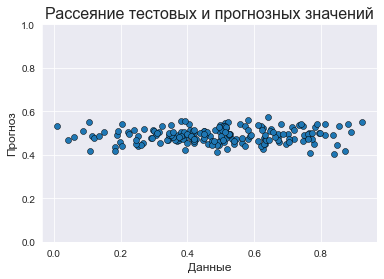

Данные   Прогноз
0    0.671890  0.480695
1    0.516082  0.477159
2    0.795275  0.499404
3    0.183940  0.437213
4    0.718669  0.471389
..        ...       ...
183  0.419591  0.472282
184  0.202503  0.542771
185  0.495389  0.528679
186  0.450012  0.477626
187  0.450404  0.495640

[188 rows x 2 columns]

In [62]:
#Создадим датасет с тестовыми данными и прогнозными значениями
feature_results = pd.DataFrame({'Данные': Ytest_values,'Прогноз': predict_values})
#Выведем график рассеяния. В случае идеального прогноза график походил бы на прямую
sns.set_style('darkgrid')
plt.title('Рассеяние тестовых и прогнозных значений',size=16)
plt.xlabel('Данные',size=12)
plt.ylabel('Прогноз',size=12)
sns.scatterplot(x='Данные', y='Прогноз', data=feature_results, edgecolor='black', palette='cubehelix')
plt.ylim(0, 1)
plt.show()
feature_results

In [55]:
model2.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets
